In [ ]:
!unzip '/content/drive/MyDrive/machineHack/Deloitte_MachineHack/Participants_Data_PLD.zip'

Archive:  /content/drive/MyDrive/machineHack/Deloitte_MachineHack/Participants_Data_PLD.zip
replace submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/._submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/._test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/._train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
train = pd.read_csv('train.csv')
train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [ ]:
train['Batch Enrolled'].value_counts()

BAT3873588    3626
BAT1586599    3142
BAT1104812    2996
BAT2252229    2557
BAT2803411    2425
BAT1780517    2403
BAT1184694    2298
BAT2078974    2290
BAT2575549    2257
BAT4694572    2248
BAT4271519    2054
BAT2558388    1963
BAT3193689    1864
BAT1930365    1844
BAT2136391    1790
BAT2333412    1775
BAT3726927    1774
BAT4136152    1766
BAT5341619    1717
BAT5525466    1709
BAT5489674    1677
BAT5629144    1639
BAT1766061    1461
BAT2833642    1421
BAT5924421    1404
BAT2522922    1399
BAT2428731    1398
BAT4808022    1303
BAT4351734    1140
BAT5547201    1127
BAT5714674    1105
BAT3461431    1068
BAT224923      895
BAT1761981     894
BAT4722912     887
BAT2003848     842
BAT1467036     802
BAT5849876     768
BAT3865626     728
BAT5811547     711
BAT1135695     296
Name: Batch Enrolled, dtype: int64

In [ ]:
train = train.drop(columns=['ID', 'Payment Plan', 'Accounts Delinquent'],axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Batch Enrolled                67463 non-null  object 
 5   Interest Rate                 67463 non-null  float64
 6   Grade                         67463 non-null  object 
 7   Sub Grade                     67463 non-null  object 
 8   Employment Duration           67463 non-null  object 
 9   Home Ownership                67463 non-null  float64
 10  Verification Status           67463 non-null  object 
 11  Loan Title                    67463 non-null  object 
 12  Debit to Income               67463 non-null  float64
 13  D

In [ ]:
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

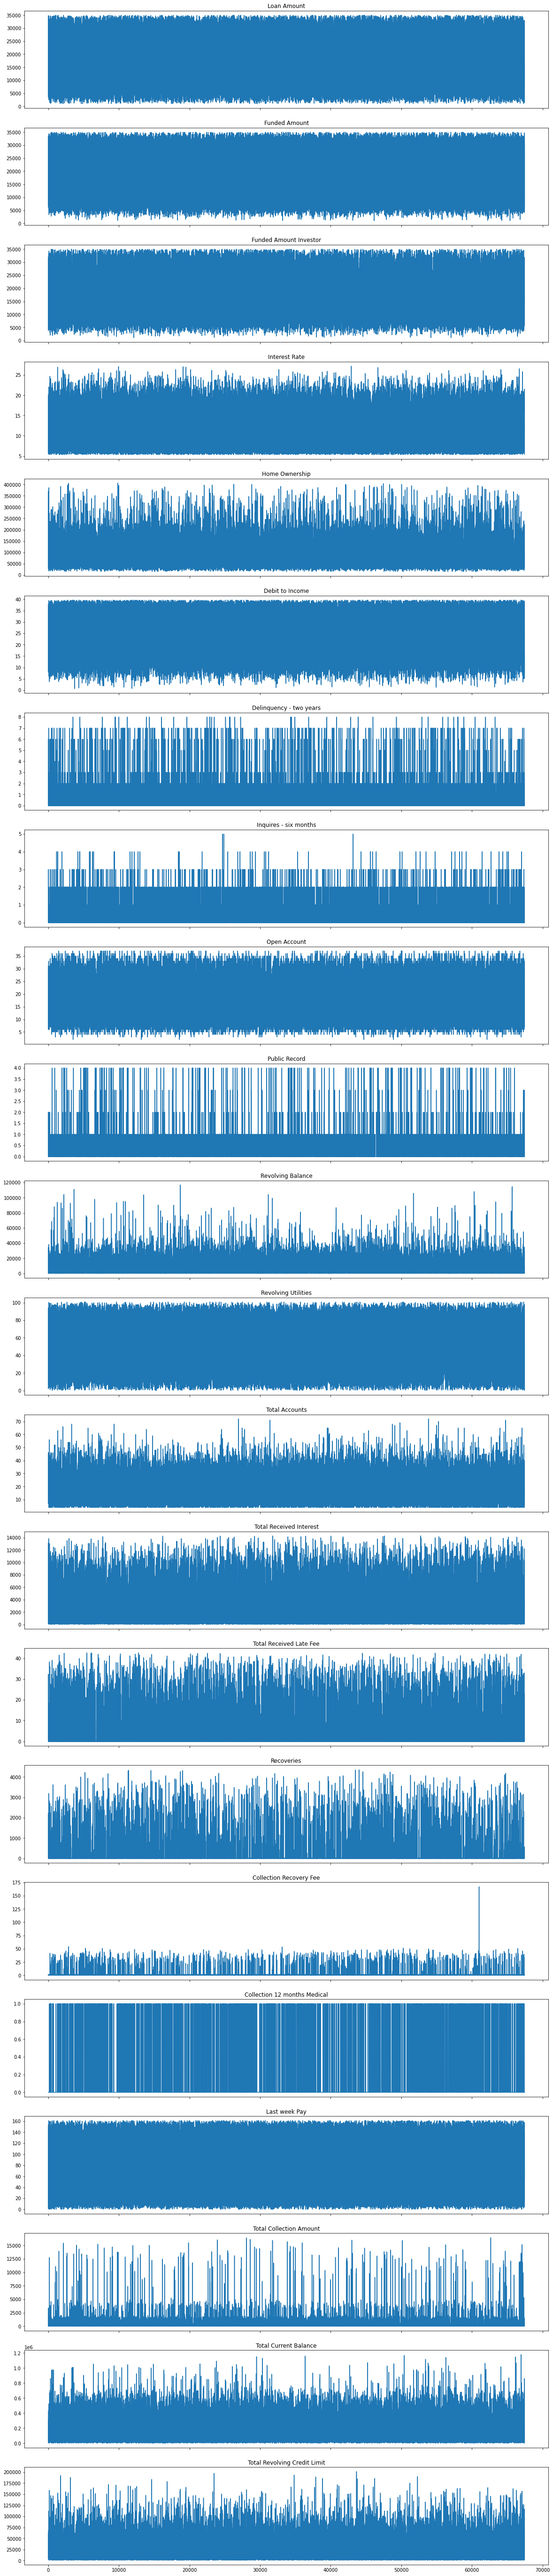

In [ ]:
columns = ['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Interest Rate',
           'Home Ownership', 'Debit to Income', 'Delinquency - two years', 'Inquires - six months',
           'Open Account', 'Public Record', 'Revolving Balance', 'Revolving Utilities',
           'Total Accounts', 'Total Received Interest', 'Total Received Late Fee', 'Recoveries',
           'Collection Recovery Fee', 'Collection 12 months Medical', 'Last week Pay',
           'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit']
fig, ax = plt.subplots(nrows=len(columns), ncols=1, sharex=True, figsize=(20,100))
for i in range(len(columns)):
    ax[i].plot(train[columns[i]])
    ax[i].set_title(columns[i])

In [ ]:
train = train[train['Collection Recovery Fee']<55]

In [ ]:
train = train.drop(columns=['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration', 'Verification Status',
                          'Loan Title', 'Initial List Status', 'Application Type'],axis=1)

In [ ]:
train_y = train['Loan Status']
train_x = train.drop(columns=['Loan Status'],axis=1)

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.3, shuffle=True)

In [ ]:
model = RandomForestRegressor(n_estimators=100, max_features='log2', max_depth=10, min_samples_leaf=26, bootstrap=True)
%time model.fit(x_train, y_train)

CPU times: user 11.1 s, sys: 25.2 ms, total: 11.2 s
Wall time: 11.1 s


RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=26)

In [ ]:
!pip install catboost

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import catboost as cb
import xgboost as xgb
import lightgbm as lgb
import sklearn.model_selection as skms 
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

In [ ]:
models=[LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),DecisionTreeRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(random_state=0, n_estimators=100),xgb.XGBRegressor(n_estimators = 400),cb.CatBoostRegressor(n_estimators=200),lgb.LGBMRegressor(n_estimators=351)]
model_names=['linear Regressor','Randomforest Regressor','Kneighbors Regressor','DecisionTreeRegressor','GradientBoostingRegressor','AdaBoostRegressor','XGBRegressor','CatBoost Regressor','LGBM REgressor']
rmse=[]
accuracy=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_valid)
    rmse.append(np.sqrt(mean_squared_error(test_pred,y_valid)))
    accuracy.append(clf.score(x_valid,y_valid))
d={'Modelling Algo':model_names,'RMSE':rmse,"Accuracy":accuracy}  

[19:20:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Learning rate set to 0.278585
0:	learn: 0.2876862	total: 67.1ms	remaining: 13.3s
1:	learn: 0.2875737	total: 80.4ms	remaining: 7.96s
2:	learn: 0.2874163	total: 94.2ms	remaining: 6.19s
3:	learn: 0.2872775	total: 111ms	remaining: 5.43s
4:	learn: 0.2871214	total: 124ms	remaining: 4.82s
5:	learn: 0.2869493	total: 136ms	remaining: 4.41s
6:	learn: 0.2868155	total: 149ms	remaining: 4.11s
7:	learn: 0.2867060	total: 161ms	remaining: 3.87s
8:	learn: 0.2865891	total: 174ms	remaining: 3.7s
9:	learn: 0.2864591	total: 187ms	remaining: 3.56s
10:	learn: 0.2863654	total: 206ms	remaining: 3.54s
11:	learn: 0.2862053	total: 219ms	remaining: 3.42s
12:	learn: 0.2860963	total: 231ms	remaining: 3.33s
13:	learn: 0.2860058	total: 244ms	remaining: 3.24s
14:	learn: 0.2859487	total: 256ms	remaining: 3.15s
15:	learn: 0.2858014	total: 269ms	remaining: 3.09s
16:	learn: 0.2857024	total: 281ms	r

In [ ]:
data = pd.DataFrame(d)

In [ ]:
data

,Modelling Algo,RMSE,Accuracy
0,linear Regressor,0.294180,-0.000407
1,Randomforest Regressor,0.300432,-0.043382
2,Kneighbors Regressor,0.322238,-0.200337
3,DecisionTreeRegressor,0.429989,-1.137299
4,GradientBoostingRegressor,0.294375,-0.001731
5,AdaBoostRegressor,0.294679,-0.003804
6,XGBRegressor,0.295340,-0.008315
7,CatBoost Regressor,0.297495,-0.023078
8,LGBM REgressor,0.297831,-0.025396


In [ ]:
from catboost import CatBoostRegressor
CB = CatBoostRegressor(iterations=1000, depth=3, learning_rate=0.03)

CB.fit(x_train, y_train)

0:	learn: 0.2896902	total: 8.06ms	remaining: 8.05s
1:	learn: 0.2896843	total: 15.1ms	remaining: 7.52s
2:	learn: 0.2896769	total: 22.3ms	remaining: 7.41s
3:	learn: 0.2896717	total: 28.9ms	remaining: 7.19s
4:	learn: 0.2896650	total: 35ms	remaining: 6.97s
5:	learn: 0.2896591	total: 42ms	remaining: 6.96s
6:	learn: 0.2896490	total: 48.4ms	remaining: 6.87s
7:	learn: 0.2896440	total: 55ms	remaining: 6.82s
8:	learn: 0.2896358	total: 61.7ms	remaining: 6.8s
9:	learn: 0.2896319	total: 67.6ms	remaining: 6.7s
10:	learn: 0.2896228	total: 74.5ms	remaining: 6.7s
11:	learn: 0.2896174	total: 80.2ms	remaining: 6.6s
12:	learn: 0.2896116	total: 86.9ms	remaining: 6.6s
13:	learn: 0.2896061	total: 93.9ms	remaining: 6.61s
14:	learn: 0.2896001	total: 101ms	remaining: 6.6s
15:	learn: 0.2895948	total: 108ms	remaining: 6.63s
16:	learn: 0.2895886	total: 115ms	remaining: 6.65s
17:	learn: 0.2895838	total: 121ms	remaining: 6.6s
18:	learn: 0.2895791	total: 128ms	remaining: 6.59s
19:	learn: 0.2895739	total: 135ms	remain

**For RF**

In [ ]:
pred = model.predict(x_train)
valid = model.predict(x_valid)
train_loss = log_loss(y_train, pred)
valid_loss = log_loss(y_valid, valid)

**For CB**

In [ ]:
pred_CB = CB.predict(x_train)
valid_CB = CB.predict(x_valid)
train_loss_CB = log_loss(y_train, pred_CB)
valid_loss_CB = log_loss(y_valid, valid_CB)

In [ ]:
train_loss_CB, valid_loss_CB, train_loss_CB-valid_loss_CB

(0.2965023124281987, 0.30891901430387875, -0.012416701875680058)

In [ ]:
test = pd.read_csv('test.csv')
test = test.drop(columns=['ID', 'Payment Plan', 'Accounts Delinquent', 'Batch Enrolled',
                          'Grade', 'Sub Grade', 'Employment Duration', 'Verification Status',
                          'Loan Title', 'Initial List Status', 'Application Type', 'Loan Status'],axis=1)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28913 entries, 0 to 28912
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   28913 non-null  int64  
 1   Funded Amount                 28913 non-null  int64  
 2   Funded Amount Investor        28913 non-null  float64
 3   Term                          28913 non-null  int64  
 4   Interest Rate                 28913 non-null  float64
 5   Home Ownership                28913 non-null  float64
 6   Debit to Income               28913 non-null  float64
 7   Delinquency - two years       28913 non-null  int64  
 8   Inquires - six months         28913 non-null  int64  
 9   Open Account                  28913 non-null  int64  
 10  Public Record                 28913 non-null  int64  
 11  Revolving Balance             28913 non-null  int64  
 12  Revolving Utilities           28913 non-null  float64
 13  T

In [ ]:
test_preds = model.predict(test)

In [ ]:
submit = pd.DataFrame()
submit['Loan Status'] = test_preds
submit.to_csv("submission-3.csv", index=False)

In [ ]:
p=pd.read_csv('submission-3.csv')
p[:5]

,Loan Status
0,0.091764
1,0.086994
2,0.086856
3,0.088330
4,0.090228
